In [1]:
import Pkg
Pkg.activate("../../.")
include("../../LogLoss/RealRealHighDimension.jl")
include("../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [125]:
svpath_ns = "../../Data/Van_der_Pol/mps_saves/vdp_ns_d12_chi30.jld2";
dloc =  "../../Data/Van_der_Pol/datasets/vdp_eta_01_c_1.0:2.0_k_1.0:2.0.jld2";

In [126]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [127]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 500 training samples and 100 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 12, chi_max = 30

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


In [184]:
class = 0
interp_sites = collect(50:75)
instance_idx = 74
stats, p1_ns = any_interpolate_median(fc_ns, class, instance_idx, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true)

(Dict(:MAE => 0.17545178808486595, :NN_MAE => 0.253364042339317), Plots.Plot{Plots.GRBackend}[Plot{Plots.GRBackend() n=4}])

Dict(:MAE => 0.17545178808486595, :NN_MAE => 0.253364042339317)


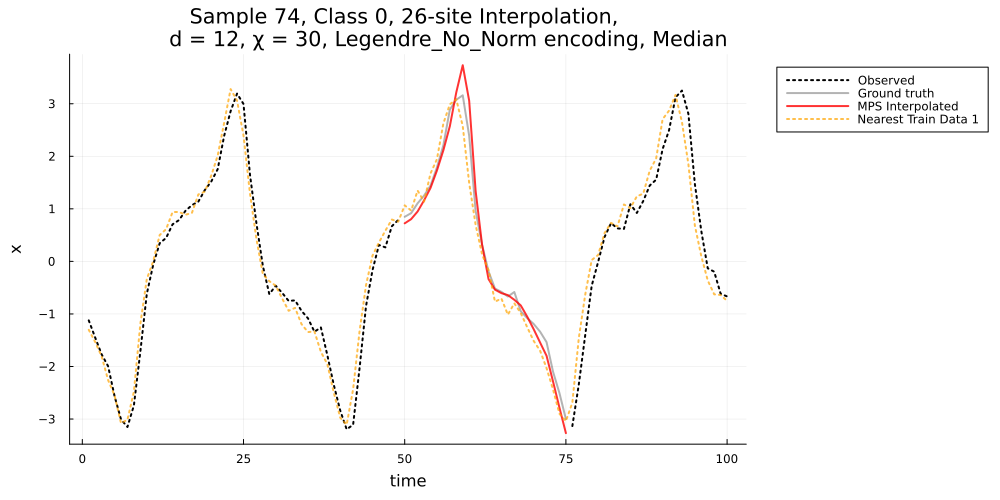

In [185]:
println(stats)
plot(p1_ns...)